In [1]:
import pandas as pd
import numpy as np
import os
import re
import time
import datetime
import gc
import string
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import math

from decimal import Decimal, getcontext

# --------------------------------------------

output_dir = r"E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\Vel_Comp"

Vel_T0_03 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\1. T_0.03\Particle_Data.csv')
Vel_T0_06 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\2. T_0.06\Particle_Data.csv')
Vel_T0_09 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\3. T_0.09\Particle_Data.csv')
Vel_T0_12 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\4 T_0.12\Particle_Data.csv')
Vel_T0_15 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\5. T_0.15\Particle_Data.csv')
Vel_T0_18 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\6. T_0.18\Particle_Data.csv')
Vel_T0_21 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\7. T_0.21\Particle_Data.csv')
Vel_T0_24 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\8. T_0.24\Particle_Data.csv')
Vel_T0_27 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\9. T_0.27\Particle_Data.csv')
Vel_T0_30 = pd.read_csv(r'E:\Cristian\1. Molecular Dinamics\2. Python Projects\3. Jupiter Code\7. Nose_Hoover Fixed\2. N_1000\1. Range_Ok\10. T_0.3\Particle_Data.csv')

# # --------------------------------------------

COLUMNAS = ['Vel_X','Vel_Y']

Vel_T0_03 = Vel_T0_03[COLUMNAS]
Vel_T0_06 = Vel_T0_06[COLUMNAS]
Vel_T0_09 = Vel_T0_09[COLUMNAS]
Vel_T0_12 = Vel_T0_12[COLUMNAS]
Vel_T0_15 = Vel_T0_15[COLUMNAS]
Vel_T0_18 = Vel_T0_18[COLUMNAS]
Vel_T0_21 = Vel_T0_21[COLUMNAS]
Vel_T0_24 = Vel_T0_24[COLUMNAS]
Vel_T0_27 = Vel_T0_27[COLUMNAS]
Vel_T0_30 = Vel_T0_30[COLUMNAS]

In [2]:
def obtener_columnas_object(dataframe):
    columnas_object = []
    tipos_datos = dataframe.dtypes
    for columna, tipo in tipos_datos.items():
        if tipo == 'object':
            columnas_object.append(columna)
    return columnas_object

def Convr_Float (DF):
    columns_to_convert = obtener_columnas_object(DF)
    DF[columns_to_convert] = DF[columns_to_convert].replace(',', '.', regex=True)
    DF[columns_to_convert] = DF[columns_to_convert].astype(float)
    return DF   

Vel_T0_03 = Convr_Float(Vel_T0_03)
Vel_T0_06 = Convr_Float(Vel_T0_06)
Vel_T0_09 = Convr_Float(Vel_T0_09)
Vel_T0_12 = Convr_Float(Vel_T0_12)
Vel_T0_15 = Convr_Float(Vel_T0_15)
Vel_T0_18 = Convr_Float(Vel_T0_18)
Vel_T0_21 = Convr_Float(Vel_T0_21)
Vel_T0_24 = Convr_Float(Vel_T0_24)
Vel_T0_27 = Convr_Float(Vel_T0_27)
Vel_T0_30 = Convr_Float(Vel_T0_30)

Vel_T0_03['Vel_M'] = np.sqrt((Vel_T0_03['Vel_X']**2)+(Vel_T0_03['Vel_Y']**2))
Vel_T0_06['Vel_M'] = np.sqrt((Vel_T0_06['Vel_X']**2)+(Vel_T0_06['Vel_Y']**2))
Vel_T0_09['Vel_M'] = np.sqrt((Vel_T0_09['Vel_X']**2)+(Vel_T0_09['Vel_Y']**2))
Vel_T0_12['Vel_M'] = np.sqrt((Vel_T0_12['Vel_X']**2)+(Vel_T0_12['Vel_Y']**2))
Vel_T0_15['Vel_M'] = np.sqrt((Vel_T0_15['Vel_X']**2)+(Vel_T0_15['Vel_Y']**2))
Vel_T0_18['Vel_M'] = np.sqrt((Vel_T0_18['Vel_X']**2)+(Vel_T0_18['Vel_Y']**2))
Vel_T0_21['Vel_M'] = np.sqrt((Vel_T0_21['Vel_X']**2)+(Vel_T0_21['Vel_Y']**2))
Vel_T0_24['Vel_M'] = np.sqrt((Vel_T0_24['Vel_X']**2)+(Vel_T0_24['Vel_Y']**2))
Vel_T0_27['Vel_M'] = np.sqrt((Vel_T0_27['Vel_X']**2)+(Vel_T0_27['Vel_Y']**2))
Vel_T0_30['Vel_M'] = np.sqrt((Vel_T0_30['Vel_X']**2)+(Vel_T0_30['Vel_Y']**2))


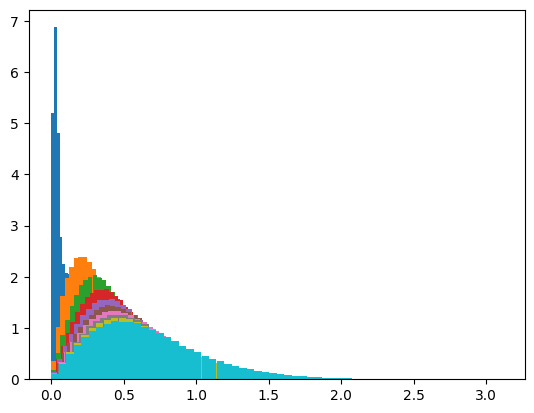

In [3]:
Hist_Vel_T0_03 = plt.hist(Vel_T0_03['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_06 = plt.hist(Vel_T0_06['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_09 = plt.hist(Vel_T0_09['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_12 = plt.hist(Vel_T0_12['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_15 = plt.hist(Vel_T0_15['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_18 = plt.hist(Vel_T0_18['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_21 = plt.hist(Vel_T0_21['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_24 = plt.hist(Vel_T0_24['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_27 = plt.hist(Vel_T0_27['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)
Hist_Vel_T0_30 = plt.hist(Vel_T0_30['Vel_M'], bins=60, alpha=1.0, rwidth=0.99, density=True)

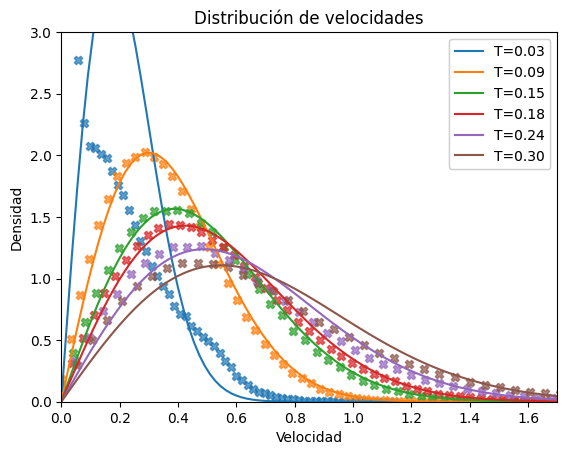

In [4]:
m = 1
kB = 1

def maxwell_f( v, Temp ) : 
  return (m*v/(kB*Temp))*np.exp(-m*(v**2)/(2*kB*Temp)) 

def maxwell_fPlot( nSteps, vf, Temp, Label) :
  vList = np.linspace(0, vf, nSteps)
  TEMP = maxwell_f(vList, Temp)
#   plt.scatter(vList, maxwell_f(vList, Temp) )
  plt.plot(vList, TEMP,label = Label)
#   plt.show()
  return [vList,TEMP]

# # Gráficos de distribuciones de Maxwell
MW_T0_03 = maxwell_fPlot(100, 1.8, 0.03,'T=0.03')
# maxwell_fPlot(100, 1.8, 0.06,'T=0.06')
MW_T0_09 = maxwell_fPlot(100, 1.8, 0.09,'T=0.09')
# maxwell_fPlot(100, 1.8, 0.12,'T=0.12')
MW_T0_15 = maxwell_fPlot(100, 1.8, 0.15,'T=0.15')
MW_T0_18 = maxwell_fPlot(100, 1.8, 0.18,'T=0.18')
# maxwell_fPlot(100, 1.8, 0.21,'T=0.21')
MW_T0_24 = maxwell_fPlot(100, 1.8, 0.24,'T=0.24')
# maxwell_fPlot(100, 1.8, 0.27,'T=0.27')
MW_T0_30 = maxwell_fPlot(100, 1.8, 0.30,'T=0.30')

legend_maxwell = plt.legend(['T=0.03','T=0.09',
                             'T=0.15','T=0.18',
                             'T=0.24','T=0.30'], loc='upper right')

# Gráficos de histogramas con símbolos 'X'
plt.scatter(Hist_Vel_T0_03[1][:-1], Hist_Vel_T0_03[0], marker='X', alpha = 0.7)
# plt.scatter(Hist_Vel_T0_06[1][:-1], Hist_Vel_T0_06[0], label='MD_T=0.06', marker='X')
plt.scatter(Hist_Vel_T0_09[1][:-1], Hist_Vel_T0_09[0],  marker='X', alpha = 0.7)
# plt.scatter(Hist_Vel_T0_12[1][:-1], Hist_Vel_T0_12[0], label='MD_T=0.12', marker='X')
plt.scatter(Hist_Vel_T0_15[1][:-1], Hist_Vel_T0_15[0],  marker='X', alpha = 0.7)
plt.scatter(Hist_Vel_T0_18[1][:-1], Hist_Vel_T0_18[0],  marker='X', alpha = 0.7)
# plt.scatter(Hist_Vel_T0_21[1][:-1], Hist_Vel_T0_21[0], label='MD_T=0.21', marker='X')
plt.scatter(Hist_Vel_T0_24[1][:-1], Hist_Vel_T0_24[0], marker='X', alpha = 0.7)
# plt.scatter(Hist_Vel_T0_27[1][:-1], Hist_Vel_T0_27[0], label='MD_T=0.27', marker='X')
plt.scatter(Hist_Vel_T0_30[1][:-1], Hist_Vel_T0_30[0], marker='X', alpha = 0.7)

# # Crear leyendas separadas
# legend_md = plt.legend(['MD_T=0.03','MD_T=0.09',
#                         'MD_T=0.15','MD_T=0.18',
#                         'MD_T=0.24','MD_T=0.30'], loc='upper center')

# Configuración de la leyenda y ejes
plt.xlabel('Velocidad')
plt.ylabel('Densidad')
plt.title('Distribución de velocidades')

# Agregar ambas leyendas al gráfico
# plt.gca().add_artist(legend_md)
plt.gca().add_artist(legend_maxwell)

# Ajustar límites y mostrar el gráfico
plt.xlim((0, 1.7))
plt.ylim((0, 3))

plt.savefig(os.path.join(output_dir, "Vel_Comp.png"))


In [5]:
MD_df_T0_03 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MD_df_T0_03['Densidad'] = Hist_Vel_T0_03[0]
MD_df_T0_03['Velocidad'] = Hist_Vel_T0_03[1][:-1]

MD_df_T0_09 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MD_df_T0_09['Densidad'] = Hist_Vel_T0_09[0]
MD_df_T0_09['Velocidad'] = Hist_Vel_T0_09[1][:-1]

MD_df_T0_15 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MD_df_T0_15['Densidad'] = Hist_Vel_T0_15[0]
MD_df_T0_15['Velocidad'] = Hist_Vel_T0_15[1][:-1]

MD_df_T0_18 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MD_df_T0_18['Densidad'] = Hist_Vel_T0_18[0]
MD_df_T0_18['Velocidad'] = Hist_Vel_T0_18[1][:-1]

MD_df_T0_24 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MD_df_T0_24['Densidad'] = Hist_Vel_T0_24[0]
MD_df_T0_24['Velocidad'] = Hist_Vel_T0_24[1][:-1]

MD_df_T0_30 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MD_df_T0_30['Densidad'] = Hist_Vel_T0_30[0]
MD_df_T0_30['Velocidad'] = Hist_Vel_T0_30[1][:-1]

In [6]:
MB_df_T0_03 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MB_df_T0_03['Velocidad'], MB_df_T0_03['Densidad'] = MW_T0_03[0], MW_T0_03[1]

MB_df_T0_09 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MB_df_T0_09['Velocidad'], MB_df_T0_09['Densidad'] = MW_T0_09[0], MW_T0_09[1]

MB_df_T0_15 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MB_df_T0_15['Velocidad'], MB_df_T0_15['Densidad'] = MW_T0_15[0], MW_T0_15[1]

MB_df_T0_18 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MB_df_T0_18['Velocidad'], MB_df_T0_18['Densidad'] = MW_T0_18[0], MW_T0_18[1]

MB_df_T0_24 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MB_df_T0_24['Velocidad'], MB_df_T0_24['Densidad'] = MW_T0_24[0], MW_T0_24[1]

MB_df_T0_30 = pd.DataFrame(columns=['Velocidad', 'Densidad'])
MB_df_T0_30['Velocidad'], MB_df_T0_30['Densidad'] = MW_T0_30[0], MW_T0_30[1]


In [7]:
def Save_CSV(df,directory,name):
    ruta = os.path.join(directory, name)
    df.to_csv(ruta, sep='\t', index=False)
    
Save_CSV(MD_df_T0_03,output_dir,"MD_T0_03.csv")
Save_CSV(MD_df_T0_09,output_dir,"MD_T0_09.csv")
Save_CSV(MD_df_T0_15,output_dir,"MD_T0_15.csv")
Save_CSV(MD_df_T0_18,output_dir,"MD_T0_18.csv")
Save_CSV(MD_df_T0_24,output_dir,"MD_T0_24.csv")
Save_CSV(MD_df_T0_30,output_dir,"MD_T0_30.csv")

Save_CSV(MB_df_T0_03,output_dir,"Ideal_T0_03.csv")
Save_CSV(MB_df_T0_09,output_dir,"Ideal_T0_09.csv")
Save_CSV(MB_df_T0_15,output_dir,"Ideal_T0_15.csv")
Save_CSV(MB_df_T0_18,output_dir,"Ideal_T0_18.csv")
Save_CSV(MB_df_T0_24,output_dir,"Ideal_T0_24.csv")
Save_CSV(MB_df_T0_30,output_dir,"Ideal_T0_30.csv")
